## 使用pandas 讀取資料

In [6]:
import pandas as pd
# 使用index_col => 使用Date 當做索引, parse_dates => 將資料轉換為日期格式
data = pd.read_csv('C:\\Users\\Student\GoogleTrendsData.csv', index_col='Date', parse_dates=True)
data.head()

,djia,debt
Date,,
2004-01-14,10485.18,0.210000
2004-01-22,10528.66,0.210000
2004-01-28,10702.51,0.210000
2004-02-04,10499.18,0.213333
2004-02-11,10579.03,0.200000


In [8]:
# 計算相關係數
data.corr()

,djia,debt
djia,1.000000,-0.420986
debt,-0.420986,1.000000


In [9]:
# 觀察數據輪廓
data.describe()

,djia,debt
count,373.000000,373.000000
mean,10915.364504,0.195389
std,1432.781912,0.027646
min,6547.050000,0.120000
25%,10238.220000,0.180000
50%,10725.430000,0.190000
75%,11857.810000,0.210000
max,14087.550000,0.316667


In [11]:
#列出DataFrame 的資訊
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 2004-01-14 to 2011-03-02
Data columns (total 2 columns):
djia    373 non-null float64
debt    373 non-null float64
dtypes: float64(2)
memory usage: 8.7 KB


## 繪製GoogleTrend 與股價的關係

Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009F85978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A13B0B8>], dtype=object)

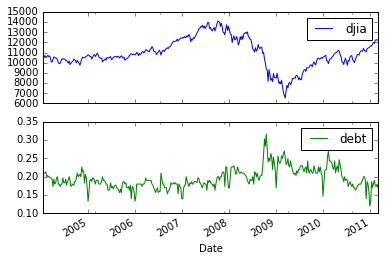

In [12]:
%pylab inline #讓我們的圖表在Jupyter Notebook 中產生
data.plot(subplots=True) # subplots 將所有數據畫在同一張圖上

## 算出Search Word 三週的移動平均

In [13]:
#因為我們的日期區間是一星期，　所以rolling_mean 參數為3 代表取三週移動平均
data['debt_mavg'] = pd.rolling_mean(data.debt, 3) 
data.head()

C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  from ipykernel import kernelapp as app


,djia,debt,debt_mavg
Date,,,
2004-01-14,10485.18,0.210000,NaN
2004-01-22,10528.66,0.210000,NaN
2004-01-28,10702.51,0.210000,0.210000
2004-02-04,10499.18,0.213333,0.211111
2004-02-11,10579.03,0.200000,0.207778


Populating the interactive namespace from numpy and matplotlib


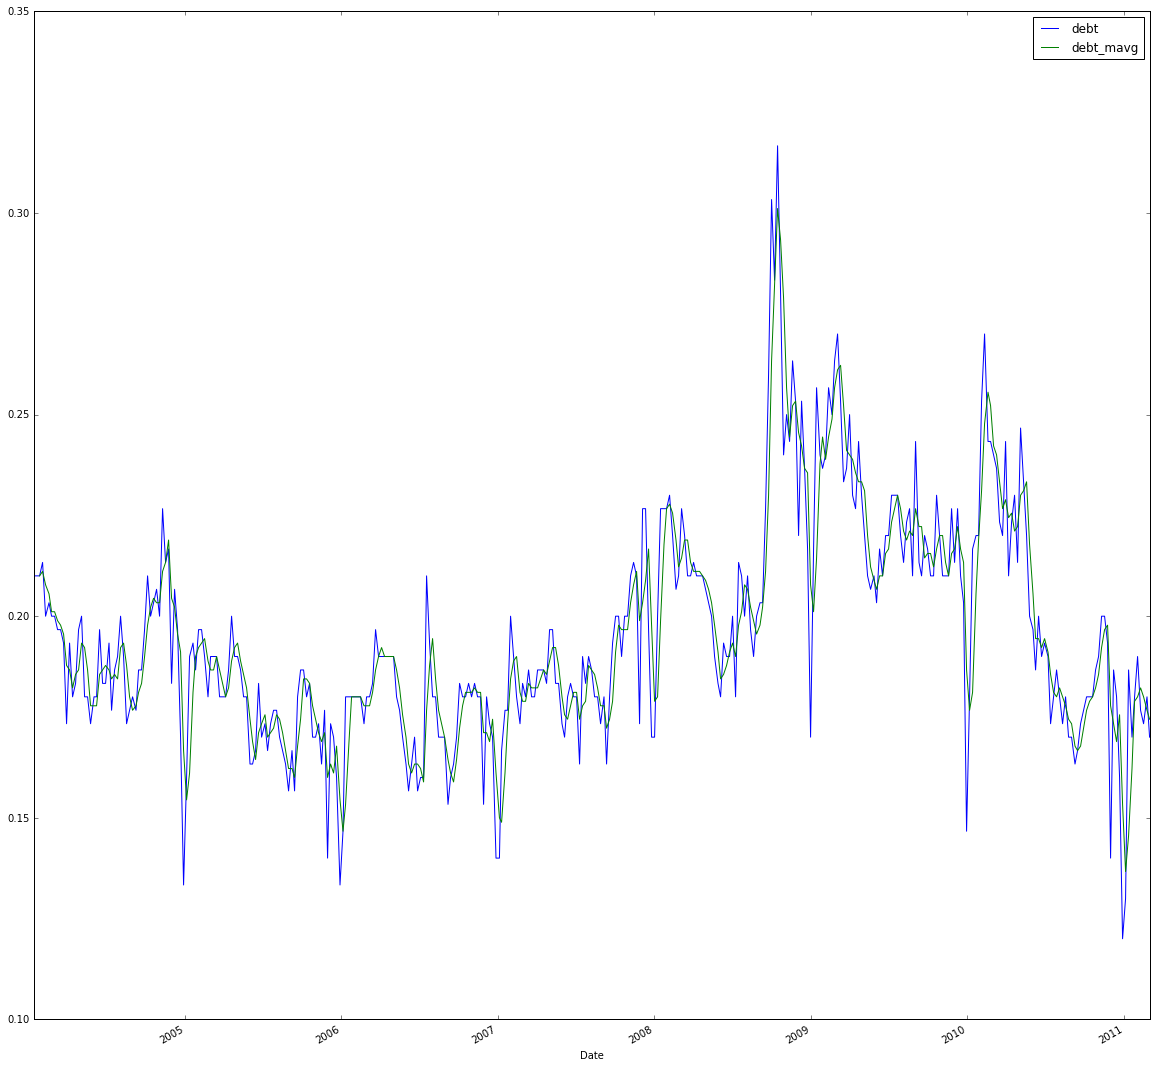

In [18]:
%pylab inline 
data[['debt','debt_mavg']].plot(figsize=[20,20])

## 將三週平均資料平移一天

In [19]:
data['debt_mavg'] = data.debt_mavg.shift(1)
data.head(10)

,djia,debt,debt_mavg
Date,,,
2004-01-14,10485.18,0.210000,NaN
2004-01-22,10528.66,0.210000,NaN
2004-01-28,10702.51,0.210000,NaN
2004-02-04,10499.18,0.213333,0.210000
2004-02-11,10579.03,0.200000,0.211111
2004-02-19,10714.88,0.203333,0.207778
2004-02-25,10609.62,0.200000,0.205555
2004-03-03,10678.14,0.200000,0.201111
2004-03-10,10529.48,0.196667,0.201111


Populating the interactive namespace from numpy and matplotlib


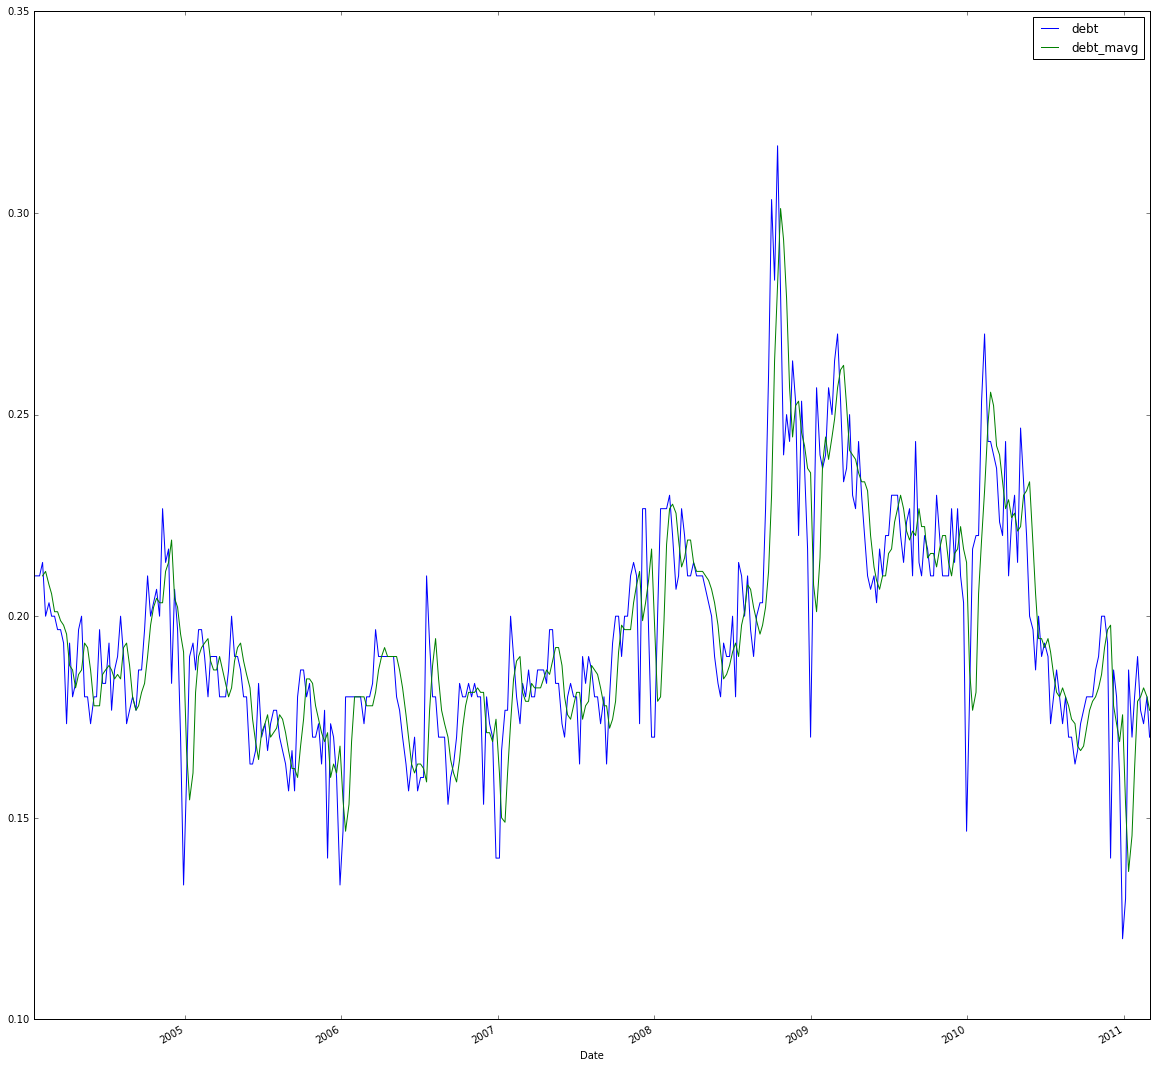

In [20]:
%pylab inline 
data[['debt','debt_mavg']].plot(figsize=[20,20])

## 設定買賣策略

In [21]:
data['order'] = 0

In [23]:
data.head()

,djia,debt,debt_mavg,order
Date,,,,
2004-01-14,10485.18,0.210000,NaN,0
2004-01-22,10528.66,0.210000,NaN,0
2004-01-28,10702.51,0.210000,NaN,0
2004-02-04,10499.18,0.213333,0.210000,0
2004-02-11,10579.03,0.200000,0.211111,0


In [26]:
#data.debt > data.debt_mavg

In [27]:
# Debt Term 黃金交叉賣出
data['order'][data.debt > data.debt_mavg] = -1 
# Debt Term 死亡交叉買進
data['order'][data.debt < data.debt_mavg] = 1
data.head(10)

C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,djia,debt,debt_mavg,order
Date,,,,
2004-01-14,10485.18,0.210000,NaN,0
2004-01-22,10528.66,0.210000,NaN,0
2004-01-28,10702.51,0.210000,NaN,0
2004-02-04,10499.18,0.213333,0.210000,-1
2004-02-11,10579.03,0.200000,0.211111,1
2004-02-19,10714.88,0.203333,0.207778,1
2004-02-25,10609.62,0.200000,0.205555,1
2004-03-03,10678.14,0.200000,0.201111,1
2004-03-10,10529.48,0.196667,0.201111,1


## 計算道瓊報酬

In [31]:
d1 = data.djia.pct_change() # 算出每週報酬
d2 = data.djia / data.djia.shift(1) - 1 # 算出每週報酬

In [32]:
d1.head()

Date
2004-01-14         NaN
2004-01-22    0.004147
2004-01-28    0.016512
2004-02-04   -0.018998
2004-02-11    0.007605
Name: djia, dtype: float64

In [33]:
d2.head()

Date
2004-01-14         NaN
2004-01-22    0.004147
2004-01-28    0.016512
2004-02-04   -0.018998
2004-02-11    0.007605
Name: djia, dtype: float64

In [34]:
data['ret_djia'] = data.djia.pct_change()
data.head()

,djia,debt,debt_mavg,order,ret_djia
Date,,,,,
2004-01-14,10485.18,0.210000,NaN,0,NaN
2004-01-22,10528.66,0.210000,NaN,0,0.004147
2004-01-28,10702.51,0.210000,NaN,0,0.016512
2004-02-04,10499.18,0.213333,0.210000,-1,-0.018998
2004-02-11,10579.03,0.200000,0.211111,1,0.007605


## 根據買賣日調整

In [35]:
data['ret_djia'] = data['ret_djia'].shift(-1)

In [37]:
data.head()

,djia,debt,debt_mavg,order,ret_djia
Date,,,,,
2004-01-14,10485.18,0.210000,NaN,0,0.004147
2004-01-22,10528.66,0.210000,NaN,0,0.016512
2004-01-28,10702.51,0.210000,NaN,0,-0.018998
2004-02-04,10499.18,0.213333,0.210000,-1,0.007605
2004-02-11,10579.03,0.200000,0.211111,1,0.012841


In [38]:
data['ret_google'] = data.order * data.ret_djia
data.head(10)

,djia,debt,debt_mavg,order,ret_djia,ret_google
Date,,,,,,
2004-01-14,10485.18,0.210000,NaN,0,0.004147,0.000000
2004-01-22,10528.66,0.210000,NaN,0,0.016512,0.000000
2004-01-28,10702.51,0.210000,NaN,0,-0.018998,-0.000000
2004-02-04,10499.18,0.213333,0.210000,-1,0.007605,-0.007605
2004-02-11,10579.03,0.200000,0.211111,1,0.012841,0.012841
2004-02-19,10714.88,0.203333,0.207778,1,-0.009824,-0.009824
2004-02-25,10609.62,0.200000,0.205555,1,0.006458,0.006458
2004-03-03,10678.14,0.200000,0.201111,1,-0.013922,-0.013922
2004-03-10,10529.48,0.196667,0.201111,1,-0.040514,-0.040514


In [40]:
data['ret_google'].head()

Date
2004-01-14    0.000000
2004-01-22    0.000000
2004-01-28   -0.000000
2004-02-04   -0.007605
2004-02-11    0.012841
Name: ret_google, dtype: float64

In [43]:
data.ret_google.head()

Date
2004-01-14    0.000000
2004-01-22    0.000000
2004-01-28   -0.000000
2004-02-04   -0.007605
2004-02-11    0.012841
Name: ret_google, dtype: float64

## cumprod 可以累計乘積

In [52]:
df = pd.DataFrame({'val':[0.7,0.5,1.2,1.5]})
df.val.cumprod()

0    0.70
1    0.35
2    0.42
3    0.63
Name: val, dtype: float64

## 觀察資金變化

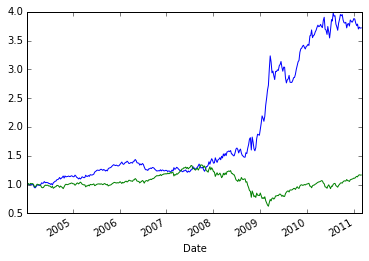

In [54]:
(1 + data.ret_google).cumprod().plot();
(1 + data.ret_djia).cumprod().plot();

## 抓取 Google Trend 的資料

In [71]:
import requests
import json
import re
res = requests.get('https://www.google.com.tw/trends/api/widgetdata/multiline?hl=zh-TW&\
tz=-480&\
req=%7B%22time%22:%222004-01-01+2016-08-06%22,%22resolution%22:%22MONTH%22,%22\
locale%22:%22zh-TW%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%7D,%22\
complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22\
value%22:%22{}%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22\
property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&\
token=APP6_UEAAAAAV6aevLOBp-myc8Rx8qjRscf6cJ_CX8eY&tz=-480'.format('感冒'))

m = re.search('("timelineData":\[.*\]),"averages":.*',res.text)
jd = json.loads('{'+m.group(1) + '}')
for ele in jd['timelineData']:
    print ele[u'formattedAxisTime'], ele ['value']

2004年1月1日 [26]
2004年2月1日 [32]
2004年3月1日 [33]
2004年4月1日 [26]
2004年5月1日 [27]
2004年6月1日 [31]
2004年7月1日 [31]
2004年8月1日 [36]
2004年9月1日 [34]
2004年10月1日 [40]
2004年11月1日 [42]
2004年12月1日 [43]
2005年1月1日 [39]
2005年2月1日 [31]
2005年3月1日 [40]
2005年4月1日 [34]
2005年5月1日 [29]
2005年6月1日 [32]
2005年7月1日 [32]
2005年8月1日 [35]
2005年9月1日 [34]
2005年10月1日 [43]
2005年11月1日 [41]
2005年12月1日 [48]
2006年1月1日 [32]
2006年2月1日 [33]
2006年3月1日 [36]
2006年4月1日 [34]
2006年5月1日 [27]
2006年6月1日 [29]
2006年7月1日 [37]
2006年8月1日 [37]
2006年9月1日 [35]
2006年10月1日 [32]
2006年11月1日 [37]
2006年12月1日 [47]
2007年1月1日 [47]
2007年2月1日 [31]
2007年3月1日 [36]
2007年4月1日 [39]
2007年5月1日 [29]
2007年6月1日 [36]
2007年7月1日 [39]
2007年8月1日 [37]
2007年9月1日 [37]
2007年10月1日 [43]
2007年11月1日 [52]
2007年12月1日 [54]
2008年1月1日 [53]
2008年2月1日 [49]
2008年3月1日 [52]
2008年4月1日 [37]
2008年5月1日 [35]
2008年6月1日 [32]
2008年7月1日 [42]
2008年8月1日 [42]
2008年9月1日 [47]
2008年10月1日 [52]
2008年11月1日 [60]
2008年12月1日 [66]
2009年1月1日 [51]
2009年2月1日 [49]
2009年3月1日 [59]
2009年4月1日 [52]
2009年5月1日 [43]
2009年6月1日 

## 安裝pytrends
- pip install pytrends

In [ ]:
from pytrends.pyGTrends import pyGTrends
import time
from random import randint

google_username = ""
google_password = ""
path = ""

# connect to Google
connector = pyGTrends(google_username, google_password)

# make request
connector.request_report("感冒")

# wait a random amount of time between requests to avoid bot detection
time.sleep(randint(5, 10))

# download file
connector.save_csv(path, "flu2")

## 讀取 Google Trend 關於感冒跟流感的資料

In [72]:
import pandas as pd
flu = pd.read_csv('flu.csv', index_col='Date', parse_dates=True)
flu.head()

,cold,flu
Date,,
2004-01-04,32,1
2004-01-11,26,1
2004-01-18,17,1
2004-01-25,26,2
2004-02-01,33,3


## 讀取康那香 (9919)

In [73]:
import pandas.io.data
tw9919 = pd.io.data.get_data_yahoo('9919.TW', 
                                 start=datetime.datetime(2004, 1, 1), 
                                 end=datetime.datetime(2016, 8, 6))

C:\Users\Student\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [75]:
tw9919.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2004-01-01,14.44652,14.44652,14.44652,14.44652,0,10.37141
2004-01-02,14.44652,14.72796,14.25896,14.63418,2379200,10.50614
2004-01-05,14.54029,14.72796,14.44652,14.54029,647700,10.43874
2004-01-06,14.63418,14.72796,14.44652,14.72796,901100,10.57346
2004-01-07,14.72796,14.72796,14.35274,14.35274,573800,10.30409


In [77]:
flu.merge(tw9919, left_index=True, right_index=True, how = 'inner')

,cold,flu,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,,


In [79]:
tw9919.index

DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-05', '2004-01-06',
               '2004-01-07', '2004-01-08', '2004-01-09', '2004-01-12',
               '2004-01-13', '2004-01-14',
               ...
               '2016-07-25', '2016-07-26', '2016-07-27', '2016-07-28',
               '2016-07-29', '2016-08-01', '2016-08-02', '2016-08-03',
               '2016-08-04', '2016-08-05'],
              dtype='datetime64[ns]', name=u'Date', length=3268, freq=None)

## 時間的操作

In [89]:
import datetime 
dt = '2014-01-01'
dt2 = datetime.datetime.strptime(dt, '%Y-%m-%d')
print dt2
print dt2 + datetime.timedelta(days = 1)

2014-01-01 00:00:00
2014-01-02 00:00:00


In [91]:
tw9919.index = tw9919.index.map(lambda e: e - datetime.timedelta(days=1))
tw9919.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,14.44652,14.44652,14.44652,14.44652,0,10.37141
2004-01-01,14.44652,14.72796,14.25896,14.63418,2379200,10.50614
2004-01-04,14.54029,14.72796,14.44652,14.54029,647700,10.43874
2004-01-05,14.63418,14.72796,14.44652,14.72796,901100,10.57346
2004-01-06,14.72796,14.72796,14.35274,14.35274,573800,10.30409


## 合併股價

In [93]:
results = tw9919.merge(flu, left_index=True, right_index=True, how='inner')
results.head()

,Open,High,Low,Close,Volume,Adj Close,cold,flu
Date,,,,,,,,
2004-01-04,14.54029,14.72796,14.44652,14.54029,647700,10.43874,32,1
2004-01-11,14.63418,14.72796,14.44652,14.44652,483200,10.37141,26,1
2004-01-18,14.44652,14.44652,14.44652,14.44652,0,10.37141,17,1
2004-01-25,14.44652,14.44652,14.44652,14.44652,0,10.37141,26,2
2004-02-01,14.82173,15.38461,14.82173,15.19706,2635800,10.91024,33,3


In [95]:
data = results[['Adj Close', 'cold', 'flu']]
data.head()

data.columns = ['tw9919', 'cold', 'flu']
data.head()

,tw9919,cold,flu
Date,,,
2004-01-04,10.43874,32,1
2004-01-11,10.37141,26,1
2004-01-18,10.37141,17,1
2004-01-25,10.37141,26,2
2004-02-01,10.91024,33,3


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 648 entries, 2004-01-04 to 2016-07-31
Data columns (total 3 columns):
tw9919    648 non-null float64
cold      648 non-null int64
flu       648 non-null int64
dtypes: float64(1), int64(2)
memory usage: 20.2 KB


## 繪製圖表

Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C491240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C890F60>], dtype=object)

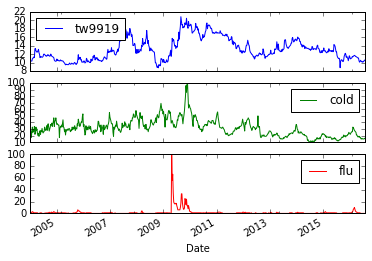

In [97]:
%pylab inline 
data.plot(subplots=True)

In [100]:
#data['cold']
#data.cold

In [101]:
data['cold_mavg'] = pd.rolling_mean(data.cold, 3)
data['flu_mavg'] = pd.rolling_mean(data.flu, 3)

C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  if __name__ == '__main__':
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  from ipykernel import kernelapp as app
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is 

Populating the interactive namespace from numpy and matplotlib


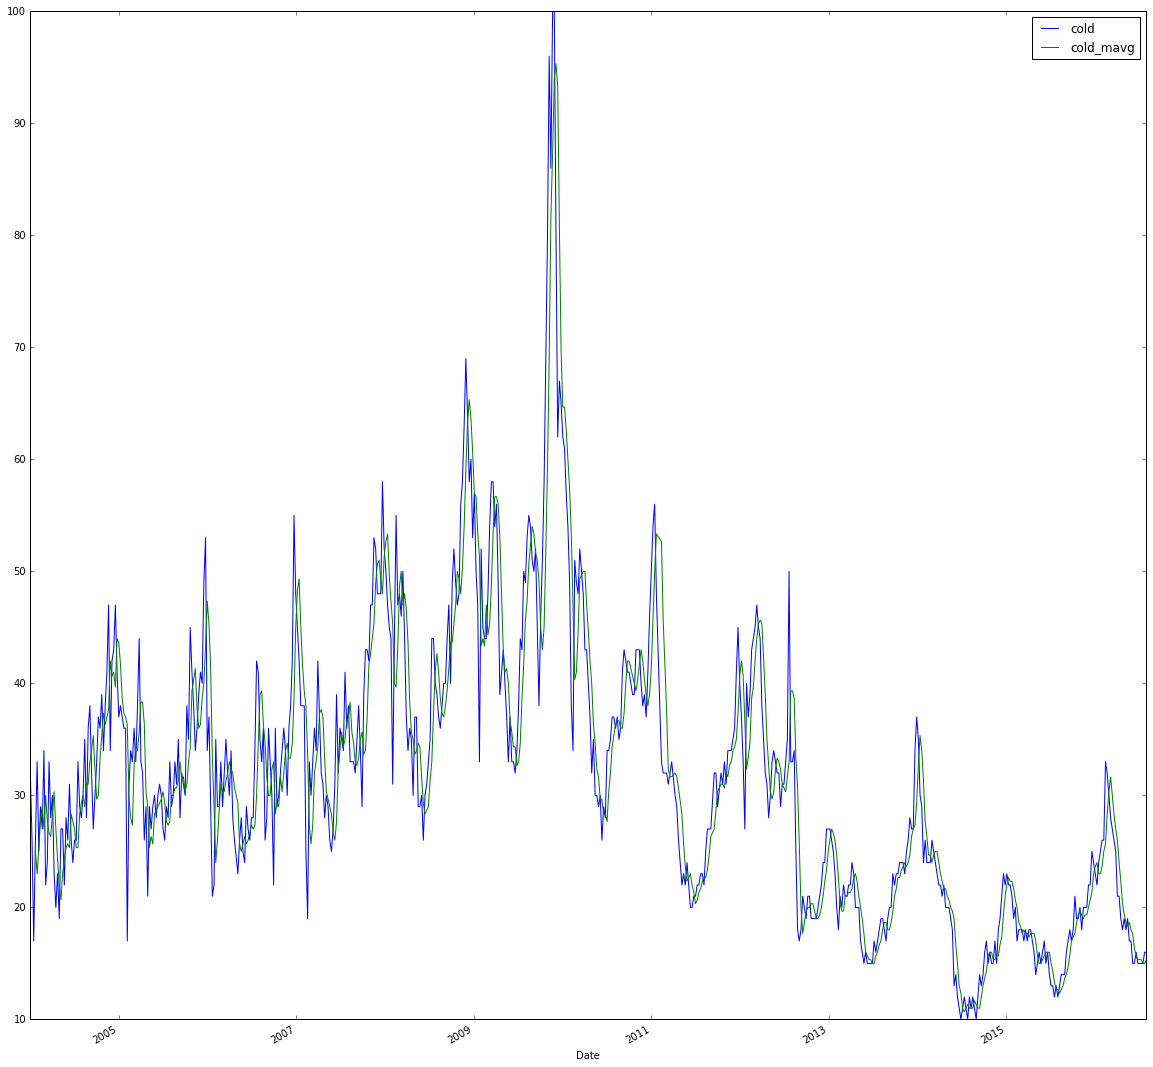

In [123]:
%pylab inline
data[['cold','cold_mavg']].plot(figsize=[20,20])

In [103]:
data.head()

,tw9919,cold,flu,cold_mavg,flu_mavg
Date,,,,,
2004-01-04,10.43874,32,1,NaN,NaN
2004-01-11,10.37141,26,1,NaN,NaN
2004-01-18,10.37141,17,1,25.000000,1.000000
2004-01-25,10.37141,26,2,23.000000,1.333333
2004-02-01,10.91024,33,3,25.333333,2.000000


In [104]:
data['flu_mavg'] = data.flu_mavg.shift(1)
data['cold_mavg'] = data.cold_mavg.shift(1)
data.head(10)

C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,tw9919,cold,flu,cold_mavg,flu_mavg
Date,,,,,
2004-01-04,10.43874,32,1,NaN,NaN
2004-01-11,10.37141,26,1,NaN,NaN
2004-01-18,10.37141,17,1,NaN,NaN
2004-01-25,10.37141,26,2,25.000000,1.000000
2004-02-01,10.91024,33,3,23.000000,1.333333
2004-02-08,10.97756,25,2,25.333333,2.000000
2004-02-15,11.24694,29,2,28.000000,2.333333
2004-02-22,11.31426,27,1,29.000000,2.333333
2004-02-29,11.17961,34,1,27.000000,1.666667


## 買賣策略

In [105]:
data['cold_order'] = 0
# 黃金交叉做多
data['cold_order'][data.cold > data.cold_mavg] = 1 
# 死亡交叉做空
data['cold_order'][data.cold < data.cold_mavg] = -1
data.head(10)

C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Student\Anaconda2\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_dat

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order
Date,,,,,,
2004-01-04,10.43874,32,1,NaN,NaN,0
2004-01-11,10.37141,26,1,NaN,NaN,0
2004-01-18,10.37141,17,1,NaN,NaN,0
2004-01-25,10.37141,26,2,25.000000,1.000000,1
2004-02-01,10.91024,33,3,23.000000,1.333333,1
2004-02-08,10.97756,25,2,25.333333,2.000000,-1
2004-02-15,11.24694,29,2,28.000000,2.333333,1
2004-02-22,11.31426,27,1,29.000000,2.333333,-1
2004-02-29,11.17961,34,1,27.000000,1.666667,1


In [112]:
data['flu_order'] = 0
# 黃金交叉做多
data['flu_order'][data.flu > data.flu_mavg] = 1 
# 死亡交叉做空
data['flu_order'][data.flu < data.flu_mavg] = -1
data.head(10)

C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order,flu_order,ret_tw9919,ret_cold,ret_flu
Date,,,,,,,,,,
2004-01-04,10.43874,32,1,NaN,NaN,0,0,-0.006450,-0.000000,-0.000000
2004-01-11,10.37141,26,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-18,10.37141,17,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-25,10.37141,26,2,25.000000,1.000000,1,1,0.051953,0.051953,0.051953
2004-02-01,10.91024,33,3,23.000000,1.333333,1,1,0.006170,0.006170,0.006170
2004-02-08,10.97756,25,2,25.333333,2.000000,-1,0,0.024539,-0.024539,-0.024539
2004-02-15,11.24694,29,2,28.000000,2.333333,1,-1,0.005986,0.005986,0.005986
2004-02-22,11.31426,27,1,29.000000,2.333333,-1,-1,-0.011901,0.011901,0.011901
2004-02-29,11.17961,34,1,27.000000,1.666667,1,-1,0.186746,0.186746,0.186746


## 計算9919報酬

In [113]:
data['ret_tw9919'] = data.tw9919.pct_change() # 計算每週報酬
data.head()

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order,flu_order,ret_tw9919,ret_cold,ret_flu
Date,,,,,,,,,,
2004-01-04,10.43874,32,1,NaN,NaN,0,0,NaN,-0.000000,-0.000000
2004-01-11,10.37141,26,1,NaN,NaN,0,0,-0.006450,0.000000,0.000000
2004-01-18,10.37141,17,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-25,10.37141,26,2,25.0,1.000000,1,1,0.000000,0.051953,0.051953
2004-02-01,10.91024,33,3,23.0,1.333333,1,1,0.051953,0.006170,0.006170


In [114]:
data['ret_tw9919'] = data['ret_tw9919'].shift(-1)

In [115]:
data.head()

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order,flu_order,ret_tw9919,ret_cold,ret_flu
Date,,,,,,,,,,
2004-01-04,10.43874,32,1,NaN,NaN,0,0,-0.006450,-0.000000,-0.000000
2004-01-11,10.37141,26,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-18,10.37141,17,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-25,10.37141,26,2,25.0,1.000000,1,1,0.051953,0.051953,0.051953
2004-02-01,10.91024,33,3,23.0,1.333333,1,1,0.006170,0.006170,0.006170


## 計算根據關鍵字買賣的報酬

In [116]:
data['ret_cold'] = data.cold_order * data.ret_tw9919
data.head(10)

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order,flu_order,ret_tw9919,ret_cold,ret_flu
Date,,,,,,,,,,
2004-01-04,10.43874,32,1,NaN,NaN,0,0,-0.006450,-0.000000,-0.000000
2004-01-11,10.37141,26,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-18,10.37141,17,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-25,10.37141,26,2,25.000000,1.000000,1,1,0.051953,0.051953,0.051953
2004-02-01,10.91024,33,3,23.000000,1.333333,1,1,0.006170,0.006170,0.006170
2004-02-08,10.97756,25,2,25.333333,2.000000,-1,0,0.024539,-0.024539,-0.024539
2004-02-15,11.24694,29,2,28.000000,2.333333,1,-1,0.005986,0.005986,0.005986
2004-02-22,11.31426,27,1,29.000000,2.333333,-1,-1,-0.011901,0.011901,0.011901
2004-02-29,11.17961,34,1,27.000000,1.666667,1,-1,0.186746,0.186746,0.186746


In [117]:
data['ret_flu'] = data.flu_order * data.ret_tw9919
data.head(10)

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order,flu_order,ret_tw9919,ret_cold,ret_flu
Date,,,,,,,,,,
2004-01-04,10.43874,32,1,NaN,NaN,0,0,-0.006450,-0.000000,-0.000000
2004-01-11,10.37141,26,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-18,10.37141,17,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-25,10.37141,26,2,25.000000,1.000000,1,1,0.051953,0.051953,0.051953
2004-02-01,10.91024,33,3,23.000000,1.333333,1,1,0.006170,0.006170,0.006170
2004-02-08,10.97756,25,2,25.333333,2.000000,-1,0,0.024539,-0.024539,0.000000
2004-02-15,11.24694,29,2,28.000000,2.333333,1,-1,0.005986,0.005986,-0.005986
2004-02-22,11.31426,27,1,29.000000,2.333333,-1,-1,-0.011901,0.011901,0.011901
2004-02-29,11.17961,34,1,27.000000,1.666667,1,-1,0.186746,0.186746,-0.186746


## 觀察資金變化

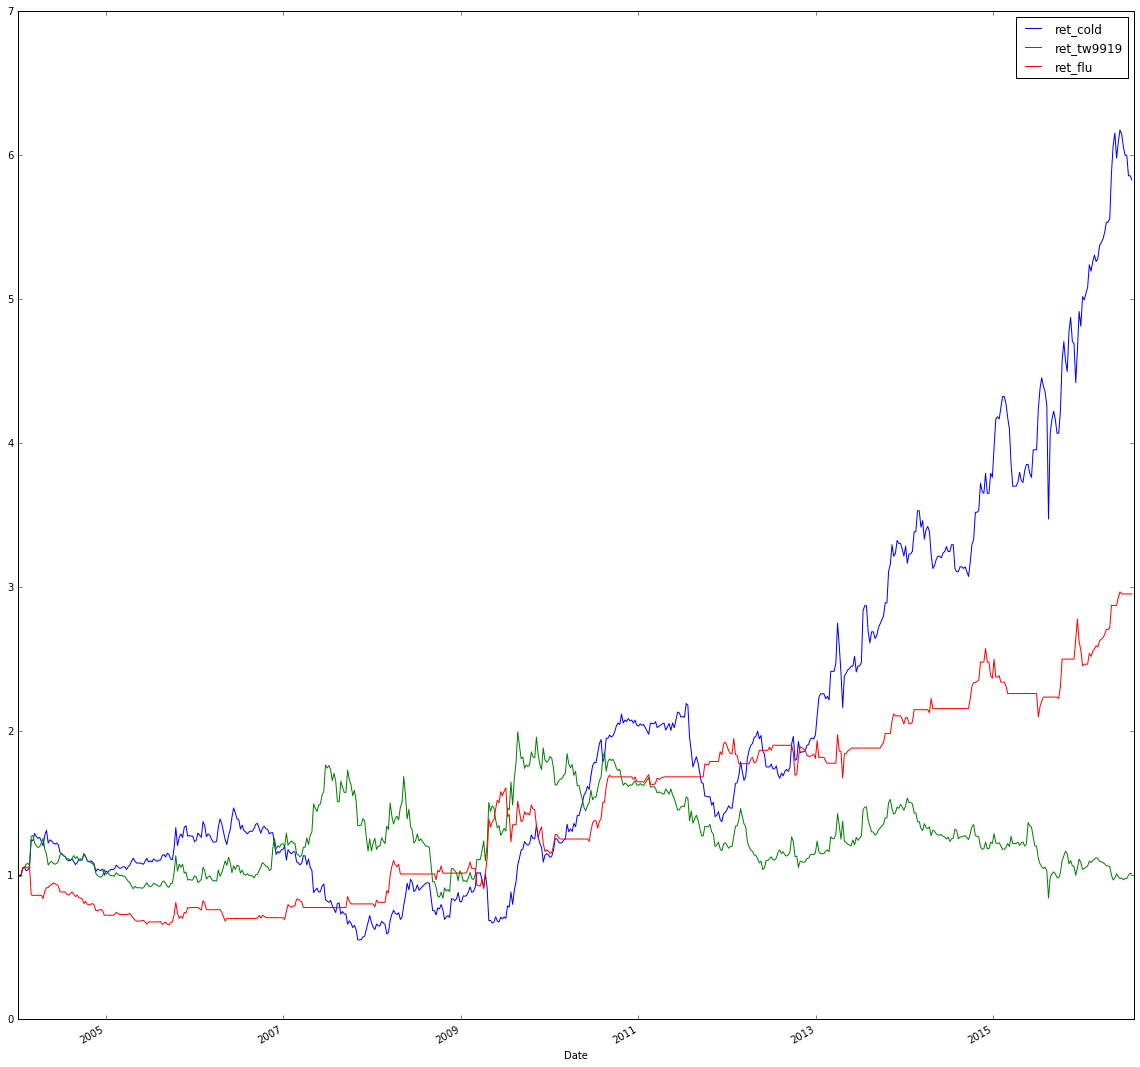

In [126]:
(1 + data.ret_cold).cumprod().plot(legend=True, figsize=[20,20])
(1 + data.ret_tw9919).cumprod().plot(legend=True)
(1 + data.ret_flu).cumprod().plot(legend=True)

In [129]:
?data.ret_cold.plot

# 貸款違約用戶探勘

## 使用Pandas 讀取資料

In [173]:
import pandas as pd
trainset = pd.read_csv('C:\\Users\\Student\\Training50.csv')
trainset.head()

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,...,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,497,1,3,6,2,3,2108,1,3,2,...,2,1,29,2,1,1,1,1,1,1
1,756,0,1,15,1,4,950,1,4,4,...,3,3,33,2,1,2,1,2,1,1
2,580,0,1,42,2,3,7174,4,3,4,...,3,3,30,2,2,1,1,1,2,1
3,833,0,3,36,3,4,7980,4,1,4,...,4,3,27,2,1,2,1,1,2,1
4,602,1,3,24,3,2,2028,1,3,2,...,2,2,30,2,2,2,1,1,1,1


In [174]:
trainset.columns

Index([u'Unnamed: 0', u'Creditability', u'Account.Balance',
       u'Duration.of.Credit..month.', u'Payment.Status.of.Previous.Credit',
       u'Purpose', u'Credit.Amount', u'Value.Savings.Stocks',
       u'Length.of.current.employment', u'Instalment.per.cent',
       u'Sex...Marital.Status', u'Guarantors', u'Duration.in.Current.address',
       u'Most.valuable.available.asset', u'Age..years.', u'Concurrent.Credits',
       u'Type.of.apartment', u'No.of.Credits.at.this.Bank', u'Occupation',
       u'No.of.dependents', u'Telephone', u'Foreign.Worker'],
      dtype='object')

In [175]:
pd.get_dummies(trainset['Account.Balance']).head()

,1,2,3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [176]:
# 類別資料
cat_var = [u'Account.Balance', u'Payment.Status.of.Previous.Credit',
       u'Purpose', u'Value.Savings.Stocks',
       u'Length.of.current.employment', u'Instalment.per.cent',
       u'Sex...Marital.Status', u'Guarantors', u'Duration.in.Current.address',
       u'Most.valuable.available.asset', u'Concurrent.Credits',
       u'Type.of.apartment', u'No.of.Credits.at.this.Bank', u'Occupation',
       u'No.of.dependents', u'Telephone', u'Foreign.Worker']
# 數值資料
num_var = [u'Duration.of.Credit..month.', u'Credit.Amount', u'Age..years.']

In [177]:
train_df = trainset['Creditability']

for var in cat_var:
    train_df = pd.concat([train_df,pd.get_dummies(trainset[var])],axis=1)

train_df = pd.concat([train_df,trainset[num_var]],axis=1)

In [178]:
train_df.head()

,Creditability,1,2,3,1,2,3,1,2,3,...,1,1,2,1,2,1,2,Duration.of.Credit..month.,Credit.Amount,Age..years.
0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,6,2108,29
1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,15,950,33
2,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,42,7174,30
3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,36,7980,27
4,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,24,2028,30


## 建立決策樹

In [144]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_df.drop('Creditability', axis = 1), train_df['Creditability'])

In [145]:
# 移除Creditability 欄位(axis = 1)
train_df.drop('Creditability', axis = 1).columns

Index([                            1,                             2,
                                   3,                             1,
                                   2,                             3,
                                   1,                             2,
                                   3,                             4,
                                   1,                             2,
                                   3,                             4,
                                   1,                             2,
                                   3,                             4,
                                   1,                             2,
                                   3,                             4,
                                   1,                             2,
                                   3,                             1,
                                   2,                             1,
                                  

## 讀取測試資料集

In [148]:
import pandas as pd
testset = pd.read_csv('C:\\Users\\Student\\Test50.csv')
testset.head()

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,...,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,2,1,1,9,3,4,2799,1,2,2,...,2,1,36,2,1,2,1,2,1,1
1,4,1,1,12,3,4,2122,1,2,3,...,2,1,39,2,1,2,1,2,1,2
2,10,1,2,24,2,3,3758,3,1,1,...,4,4,23,2,1,1,1,1,1,1
3,11,1,1,11,3,4,3905,1,2,2,...,2,1,36,2,1,2,1,2,1,1
4,13,1,1,6,3,3,1957,1,3,1,...,4,3,31,2,2,1,1,1,1,1


In [149]:
# 類別資料
cat_var = [u'Account.Balance', u'Payment.Status.of.Previous.Credit',
       u'Purpose', u'Value.Savings.Stocks',
       u'Length.of.current.employment', u'Instalment.per.cent',
       u'Sex...Marital.Status', u'Guarantors', u'Duration.in.Current.address',
       u'Most.valuable.available.asset', u'Concurrent.Credits',
       u'Type.of.apartment', u'No.of.Credits.at.this.Bank', u'Occupation',
       u'No.of.dependents', u'Telephone', u'Foreign.Worker']
# 數值資料
num_var = [u'Duration.of.Credit..month.', u'Credit.Amount', u'Age..years.']

In [151]:
test_df = testset['Creditability']

for var in cat_var:
    test_df = pd.concat([test_df,pd.get_dummies(testset[var])],axis=1)

test_df = pd.concat([test_df,testset[num_var]],axis=1)

## 產生預測結果

In [164]:
predicted = clf.predict(test_df.drop('Creditability', axis = 1))
predicted

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0,

## 驗證模型

In [167]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(test_df['Creditability'], predicted) 
print cm
# integer / integer = integer, 需要改變成　 float / integer = float
print (65.0 + 256.0) / (65 + 92 + 87 + 256) 

[[ 65  92]
 [ 87 256]]
0.642


## ROC Curve

In [169]:
pred_scr = clf.predict_proba(test_df.drop('Creditability', axis = 1))[:, 1]
print pred_scr

[ 1.  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.
  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.
  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.
  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.
  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.
  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.
  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.
  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


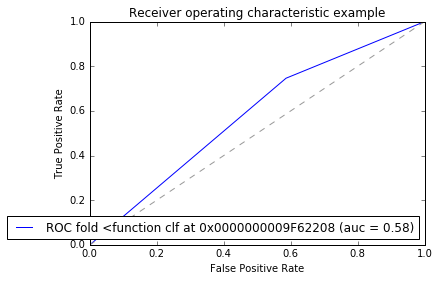

In [170]:
%pylab inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(test_df['Creditability'], pred_scr)
roc_auc =  auc(fpr, tpr)
md = str(clf)
md = md[:md.find('(')]
plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))
        
# 圖表配置
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 建立多個模型

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(LogisticRegression())
models.append(RandomForestClassifier(n_estimators=100, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth =4))
models.append(GaussianNB())

for model in models:
    model.fit(train_df.drop('Creditability', axis=1), train_df['Creditability'])

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


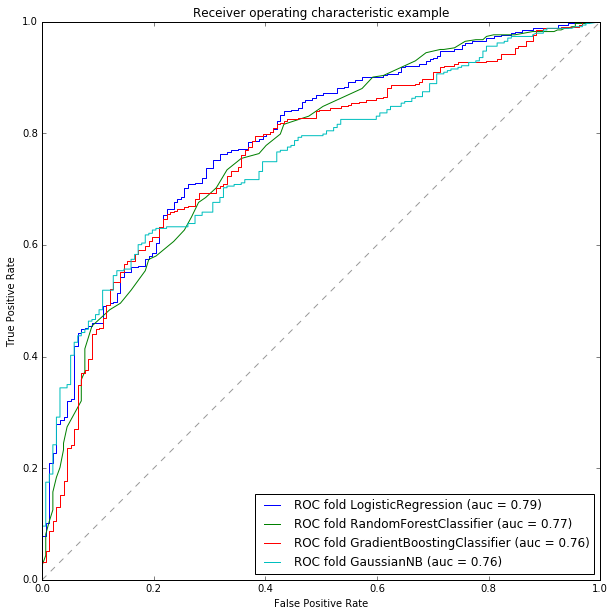

In [180]:
%pylab inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

def roc_comparison(models, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 10)) 
    for model in models:
        pred_scr = model.predict_proba(X_test)[:, 1] #得到預測機率
        fpr, tpr, thresholds = roc_curve(y_test, pred_scr) # 求出 False Positive Rate, True Positive Rate
        roc_auc =  auc(fpr, tpr) # 求出auc
        md = str(model) 
        md = md[:md.find('(')]
        plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc)) # 加auc 到legend中
        

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6)) #設置隨機線(黑線)的範圍跟顏色, 線的狀態
    plt.xlim([0, 1]) #(設置x 範圍)
    plt.ylim([0, 1]) #(設置y 範圍)
    plt.xlabel('False Positive Rate') #設置x標籤
    plt.ylabel('True Positive Rate') #設置y標籤
    plt.title('Receiver operating characteristic example') #設置標題
    plt.legend(loc="lower right") #設置Legend 呈現的位置
    plt.show() #顯示圖片
    
roc_comparison(models, train_df.drop('Creditability', axis=1), test_df.drop('Creditability', axis=1), train_df['Creditability'], test_df['Creditability'])

# 文字探勘

## 英文斷詞

In [181]:
e = 'this is a book'
e.split()

['this', 'is', 'a', 'book']

## 中文斷詞

In [183]:
c = '那我們酸民婉君也可以報名嗎?'
#c.split()

In [187]:
input_sentence=u'那我們酸民婉君也可以報名嗎'

sentence  = input_sentence

print sentence[0:2]
print sentence[1:3]
print sentence[2:4]


那我
我們
們酸


In [190]:
print len(sentence) - 2 + 1

for i in range(0, len(sentence) - 2 + 1): # 從 0 ~ 12
    print sentence[i:i+2]

12
那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嗎


In [192]:
sentence = u'大巨蛋不就好棒棒'
for i in range(0, len(sentence) - 2 + 1): 
    print sentence[i:i+2]

大巨
巨蛋
蛋不
不就
就好
好棒
棒棒


In [193]:
# trigram
sentence = u'大巨蛋不就好棒棒'
for i in range(0, len(sentence) - 3 + 1): 
    print sentence[i:i+3]

大巨蛋
巨蛋不
蛋不就
不就好
就好棒
好棒棒


In [194]:
def addnum(a,b):
    return a + b

print addnum(3,5)

8


In [196]:
dic = {'a':1, 'b':2}
print dic['a']

1


In [200]:
dic = {}
s = 'crises in financial markets affect humans worldwide. Detailed market data on trading decisions reflect some of the complex human behavior that has led to these crises'
for w in s.split():
    if w not in dic: # 不存在字典中
        dic[w] = 1 # 將資料加到字典之中
    else:
        dic[w] += 1 # 將字典後面的值 +1 
dic

{'Detailed': 1,
 'affect': 1,
 'behavior': 1,
 'complex': 1,
 'crises': 2,
 'data': 1,
 'decisions': 1,
 'financial': 1,
 'has': 1,
 'human': 1,
 'humans': 1,
 'in': 1,
 'led': 1,
 'market': 1,
 'markets': 1,
 'of': 1,
 'on': 1,
 'reflect': 1,
 'some': 1,
 'that': 1,
 'the': 1,
 'these': 1,
 'to': 1,
 'trading': 1,
 'worldwide.': 1}

In [207]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence
    for i in range(0, len(sentence) - n + 1):
        w = sentence[i:i+n]
        if sentence[i:i+n] not in word_dic:
            word_dic[w] = 1
        else:
            word_dic[w] = word_dic[w] + 1
    return word_dic

c = u'那我們酸民婉君也可以報名嗎?'
for w in ngram(c, 2):
    print w
    
for w in ngram(c, 3):
    print w

我們
婉君
報名
們酸
可以
名嗎
君也
也可
嗎?
民婉
那我
酸民
以報
酸民婉
君也可
名嗎?
可以報
也可以
們酸民
以報名
民婉君
報名嗎
那我們
婉君也
我們酸


In [210]:
article = u'''
原本預計要和謝淑薇一同參加里約奧運雙打的選手莊佳容，因謝淑薇決意退賽，無緣出征奧運，忍不住在臉書大吐苦水，甚至飆髒話。
有許多粉絲挺莊，但也有網友認為，「犧牲自己奧運出賽的機會對運動員來說是多大的決定，老實說你只是沒搭到原本就不屬於你的便車不是嗎？」謝淑薇則在底下回覆網友：「請不要傷害選手」。
謝淑薇在莊佳容的臉書留言回覆表示：「不好意思，最近讓大家因為運動員體制問題而不高興了⋯⋯。我跟莊選手的事，我們自己私下解決。如果可以，幫我一個忙，刪除你們不開心的留言，好嗎？」她說，她們都是體制下的受害者，「請不要傷害選手...感謝」
'''

print [u'原']
print ['原']

[u'\u539f']
['\xe5\x8e\x9f']


In [218]:
dic = ngram(article, 2)
for w in dic:
    if dic[w] >= 2:
        print w, dic[w] # w => 字詞, dic[2] => 字詞對上的頻率

請不 2
害選 2
，「 2
要傷 2
原本 2
不要 2
？」 2
回覆 2
淑薇 4
：「 2
謝淑 4
留言 2
自己 2
嗎？ 2
選手 4
佳容 2
奧運 3
體制 2
.. 2
網友 2
莊佳 2
。
2
傷害 2
動員 2
臉書 2
「請 2
運動 2


In [220]:
dic = ngram(article, 3)
for w in dic:
    if dic[w] >= 2:
        print w, dic[w] # w => 字詞, dic[2] => 字詞對上的頻率

嗎？」 2
不要傷 2
莊佳容 2
運動員 2
謝淑薇 4
要傷害 2
傷害選 2
「請不 2
請不要 2
害選手 2


In [233]:
# 建立斷句函式
import re
delimiter = "，|。|、"  
text = '從句子的一端開始，取最長的詞串逐一比對辭典內的詞，若找到就把它當作斷詞的結果，再把句子中比對到的詞去除，剩下的部份再重複剛剛的動作，直到整句都斷詞完畢'

for i in re.split(delimiter, text):
    print i

從句子的一端開始
取最長的詞串逐一比對辭典內的詞
若找到就把它當作斷詞的結果
再把句子中比對到的詞去除
剩下的部份再重複剛剛的動作
直到整句都斷詞完畢


In [227]:
a = u'民進黨後天將公布'
for w in a.split(u'後天'):
    print w
    
print ''.join(a.split(u'後天'))

民進黨
將公布
民進黨將公布


In [232]:
#建立移除函式
def removeKey(text, keyword):
    textAry= text
    for key in keyword:
        textAry = ''.join(textAry.split(key))
    return textAry

a = u'民進黨後天將公布'
print removeKey(a , [u'後天', u'民進黨'])

將公布


In [231]:
# join, split 範例
a = 'I love pokemon go'
a_split =  a.split() # split 把字詞拆開
print '@'.join(a_split) # join 把字詞合併

I@love@pokemon@go


In [ ]:
dic = {}
s = 'crises in financial markets affect humans worldwide. Detailed market data on trading decisions reflect some of the complex human behavior that has led to these crises'
for w in s.split():
    if w not in dic: # 不存在字典中
        dic[w] = 1 # 將資料加到字典之中
    else:
        dic[w] += 1 # 將字典後面的值 +1 
dic

In [238]:
#Counter
from collections import Counter
c = Counter() #宣告Counter

s = 'crises in financial markets affect humans worldwide. Detailed market data on trading decisions reflect some of the complex human behavior that has led to these crises'
for w in s.split():
    c[w] += 1 # 將Counter 中的詞進行 +1 
    
c.most_common(10) # most_common 可以把最常見的詞統計出來

[('crises', 2),
 ('financial', 1),
 ('some', 1),
 ('trading', 1),
 ('human', 1),
 ('in', 1),
 ('decisions', 1),
 ('market', 1),
 ('to', 1),
 ('complex', 1)]

In [240]:
#Counter
from collections import Counter
def ngram(input_sentence, n = 2):
    c = Counter()
    sentence  = input_sentence
    for i in range(0, len(sentence) - n + 1):
        w = sentence[i:i+n]
        c[w] += 1
    return c

c = u'那我們酸民婉君也可以報名嗎?'
for w in ngram(c, 2):
    print w
    
for w in ngram(c, 3):
    print w

我們
婉君
報名
們酸
可以
名嗎
君也
也可
嗎?
民婉
那我
酸民
以報
酸民婉
君也可
名嗎?
可以報
也可以
們酸民
以報名
民婉君
報名嗎
那我們
婉君也
我們酸


In [251]:
def getSentenceNgram(summary):
    delimiter = u'，|：|。|、|/|；|（|）|\(|\)|「|」|」|《|》|／|【|……|）|「|！|‧ |？|\.'
    csummary = Counter()
    for sentence in re.split(delimiter, summary): # 斷句
        if sentence is not None and sentence.strip() != '':
                c = ngram(removeKey(sentence.strip(), keywords), i) #取ngram
                csummary = csummary + c
    return csummary

print getSentenceNgram(article)

Counter({u'\u8868\u793a': 1, u'\u662f\u55ce': 1, u'\u98c6\u9ad2': 1, u'\u7684\u4e8b': 1, u'\u4f4f\u5728': 1, u'\u4e00\u500b': 1, u'\u5011\u90fd': 1, u'\u4e00\u540c': 1, u'\u4f46\u4e5f': 1, u'\u56e0\u70ba': 1, u'\u96d9\u6253': 1, u'\u8aaa\u4f60': 1, u'\u958b\u5fc3': 1, u'\u5fcd\u4e0d': 1, u'\u6a5f\u6703': 1, u'\u53c3\u52a0': 1, u'\u52a0\u91cc': 1, u'\u597d\u55ce': 1, u'\u4f60\u5011': 1, u'\u679c\u53ef': 1, u'\u9810\u8a08': 1, u'\u72a7\u7272': 1, u'\u8a31\u591a': 1, u'\u8ddf\u838a': 1, u'\u5fc3\u7684': 1, u'\u5728\u5927': 1, u'\u5bb3\u8005': 1, u'\u5c0d\u4f86': 1, u'\u4e0d\u958b': 1, u'\u610f\u9000': 1, u'\u610f\u601d': 1, u'\u53d7\u5bb3': 1, u'\u642d\u5230': 1, u'\u5e95\u4e0b': 1, u'\u9ad8\u8208': 1, u'\u89e3\u6c7a': 1, u'\u4e0d\u597d': 1, u'\u5be6\u8aaa': 1, u'\u8208\u4e86': 1, u'\u8fd1\u8b93': 1, u'\u5230\u5c31': 1, u'\u633a\u838a': 1, u'\u5927\u5410': 1, u'\u4e0d\u4f4f': 1, u'\u8981\u548c': 1, u'\u7684\u6a5f': 1, u'\u6700\u8fd1': 1, u'\u5410\u82e6': 1, u'\u662f\u591a': 1, u'\u7d04\u9

In [253]:
article = u'''
原本預計要和謝淑薇一同參加里約奧運雙打的選手莊佳容，因謝淑薇決意退賽，無緣出征奧運，忍不住在臉書大吐苦水，甚至飆髒話。
有許多粉絲挺莊，但也有網友認為，「犧牲自己奧運出賽的機會對運動員來說是多大的決定，老實說你只是沒搭到原本就不屬於你的便車不是嗎？」謝淑薇則在底下回覆網友：「請不要傷害選手」。
謝淑薇在莊佳容的臉書留言回覆表示：「不好意思，最近讓大家因為運動員體制問題而不高興了⋯⋯。我跟莊選手的事，我們自己私下解決。如果可以，幫我一個忙，刪除你們不開心的留言，好嗎？」她說，她們都是體制下的受害者，「請不要傷害選手...感謝」
'''
keywords = []
for i in range(4, 1, -1): # 從 n = 4 ~ n = 2
    coverall = Counter()        
    c = getSentenceNgram(article) 
    coverall = coverall  + c
    for ele in coverall:
        if coverall[ele] >=2:
            keywords.append(ele)
for w in keywords:
    print w

傷害選手
要傷害選
請不要傷
不要傷害
莊佳容
運動員
請不要
謝淑薇
回覆
留言
自己
選手
奧運
體制
網友
原本
臉書


## 安裝Jieba
- pip install jieba

In [256]:
import jieba
for ele in jieba.cut(article):
    print ele

Building prefix dict from the default dictionary ...


Dumping model to file cache c:\users\student\appdata\local\temp\jieba.cache
Loading model cost 1.124 seconds.
Prefix dict has been built succesfully.


原本
預計要
和
謝淑薇
一同
參
加里
約
奧運雙
打
的
選手
莊佳容
，
因謝淑薇
決意
退賽
，
無緣
出征
奧運
，
忍不住
在
臉書
大吐苦水
，
甚至
飆
髒
話
。


有
許多粉
絲挺莊
，
但
也
有
網友
認為
，
「
犧牲
自己
奧運
出賽
的
機會
對
運動員來
說
是
多
大
的
決定
，
老實
說
你
只是
沒
搭
到
原本
就
不屬
於
你
的
便車
不是
嗎
？
」
謝淑薇則
在
底下
回覆
網友
：
「
請
不要
傷害
選手
」
。


謝淑薇
在
莊佳容
的
臉書
留言
回覆
表示
：
「
不好意思
，
最近
讓
大家
因為
運動員
體制
問題
而
不
高興
了
⋯
⋯
。
我
跟
莊選手
的
事
，
我們
自己
私下
解決
。
如果
可以
，
幫
我
一個
忙
，
刪除
你
們
不
開心
的
留言
，
好
嗎
？
」
她
說
，
她
們
都
是
體制
下
的
受害者
，
「
請
不要
傷害
選手
...
感謝
」


